In [210]:
def friendCircles2(friends):
    n = len(friends)
    M = [[char for char in line] for line in friends]
    groups = []
    for i in range(n):
        for j in range(n):
            if M[i][j] == 1 and i != j:
                added = False
                for k, group in enumerate(groups):
                    if i in group:
                        new_set = groups[k]
                        new_set.add(j)
                        groups[k] = new_set
                        added = True
                    if j in group:
                        new_set = groups[k]
                        new_set.add(i)
                        groups[k] = new_set
                        added = True
                if not added:
                    groups.append(set((i,j)))
    for i in range(n):
        seen = False
        for group in groups:
            if i in group:
                seen = True
        if not seen:
            groups.append({i})
                
        print i, groups
    print groups
    return len(groups)
            
inp = ['YNNN', 
       'YYNN', 
       'NYYN', 
       'NNNY']

inp2 = ['YY', 
        'YY']
            
friendCircles2(inp)

0 [set([0])]
1 [set([0]), set([1])]
2 [set([0]), set([1]), set([2])]
3 [set([0]), set([1]), set([2]), set([3])]
[set([0]), set([1]), set([2]), set([3])]


4

In [40]:
seen = {}

def opt(word, lib):
    if word in seen:
        return seen[word]
    num = 0
    if word in lib:
        num = max(opt(word[:i] + word[i+1:], lib) + 1 for i in range(len(word)))
    seen[word] = num
    return num

def longest_chain(w):
    lib = {word:1 for word in w}
    return max(opt(word, lib) for word in w)
    
w = ['a', 'b', 'ba', 'bca', 'bda', 'bdca']
longest_chain(w) 

4

[[1 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 1 0 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
5
0 [set([0, 7]), set([1, 4, 5, 6]), set([1, 2, 4, 5, 6])]
1 [set([0, 7]), set([1, 4, 5, 6]), set([1, 2, 4, 5, 6])]
2 [set([0, 7]), set([1, 4, 5, 6]), set([1, 2, 4, 5, 6])]
3 [set([0, 7]), set([1, 4, 5, 6]), set([1, 2, 4, 5, 6]), set([3])]
4 [set([0, 7]), set([1, 4, 5, 6]), set([1, 2, 4, 5, 6]), set([3])]
5 [set([0, 7]), set([1, 4, 5, 6]), set([1, 2, 4, 5, 6]), set([3])]
6 [set([0, 7]), set([1, 4, 5, 6]), set([1, 2, 4, 5, 6]), set([3])]
7 [set([0, 7]), set([1, 4, 5, 6]), set([1, 2, 4, 5, 6]), set([3])]
8 [set([0, 7]), set([1, 4, 5, 6]), set([1, 2, 4, 5, 6]), set([3]), set([8])]
9 [set([0, 7]), set([1, 4, 5, 6]), set([1, 2, 4, 5, 6]), set([3]), set([8]), set([9])]
[set([0, 7]), set([1, 4, 5, 6]), set([1, 2, 4, 5, 6]), set([3]), set([8]), set([9])]
6


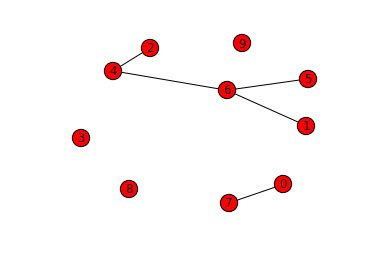

In [216]:
import numpy as np
import networkx as nx

def visitGroup(i, M, visited):
    visited[i] = True
    for j in range(len(M)):
        if M[i][j] == 1 and j not in visited:
            visitGroup(j, M, visited)
    return visited

def friendCircles(friends):
    n = len(friends)
    M = [[char for char in line] for line in friends]
    num_comp = 0
    visited = {}
    
    for i in range(n):
        if i not in visited:
            num_comp += 1
            visited = visitGroup(i, M, visited)
    return num_comp

size = 10
A = np.random.randint(3, size=(size, size))
f = np.vectorize(lambda x: 1 if x == 1 else 0)
A = f(A)
A = ((A + A.T) / 2)
np.fill_diagonal(A, 1)

print A
print friendCircles(A)
print friendCircles2(A)

G = nx.from_numpy_matrix(A)
pos = nx.spring_layout(G)
nx.draw_networkx_labels(G, pos)
nx.draw(G, pos)

##Onsite questions
- Evaluate a postfix tree e.g. "4 2 / 3 -" is 1. 
- A tree with pointers to parent elements is stored in an array. Given an index to the array, delete all the nodes in the subtree rooted at that index.
- If your website is slow and you have optimized the code on the server side what could be wrong? (network level, server RAM etc.). If a client calls up saying that they can't load your website, what do you tell them?
- You have 2 markets A and B, there is a take method A.take() and B.take() that is blocking anf gives you a tuple (ti, vi) with a time and value. Time is increasing as you take. Output all pairs (ti, tj) from A and B respectively s.t. |ti - tj| <= 1 sec. 2 seperate threads, blocking, locks.
- You are given a CSV of bike data with fields including bike_number, start_station, and end_station. Output the bike with that has been to the most number of unique stations. Groupby and sum over sets. How would you test this?
- You are given a CSV from dbpedia of company ids, name, ticker, and subsidiaries. Given a ticker, output all subsidiaries.
- Find the set intersection of 2 sets by using only constant memory. Sort the 2 lists and keep comapring the heads and incrementing the pointers.
